In [3]:
import weave
from pathlib import Path
from PIL import Image

In [59]:
image_folder = Path("tanjiro/")
image_paths = list(image_folder.iterdir())

In [64]:
ims_table = []
for img_file in image_paths:
    pil_img = Image.open(img_file)
    ims_table.append({
        "file_name": str(img_file),
        "image": pil_img,
        "width": pil_img.size[0],
        "height": pil_img.size[1],
    })
ims_table = weave.save(ims_table, name="tanjiro")

In [65]:
ims_table

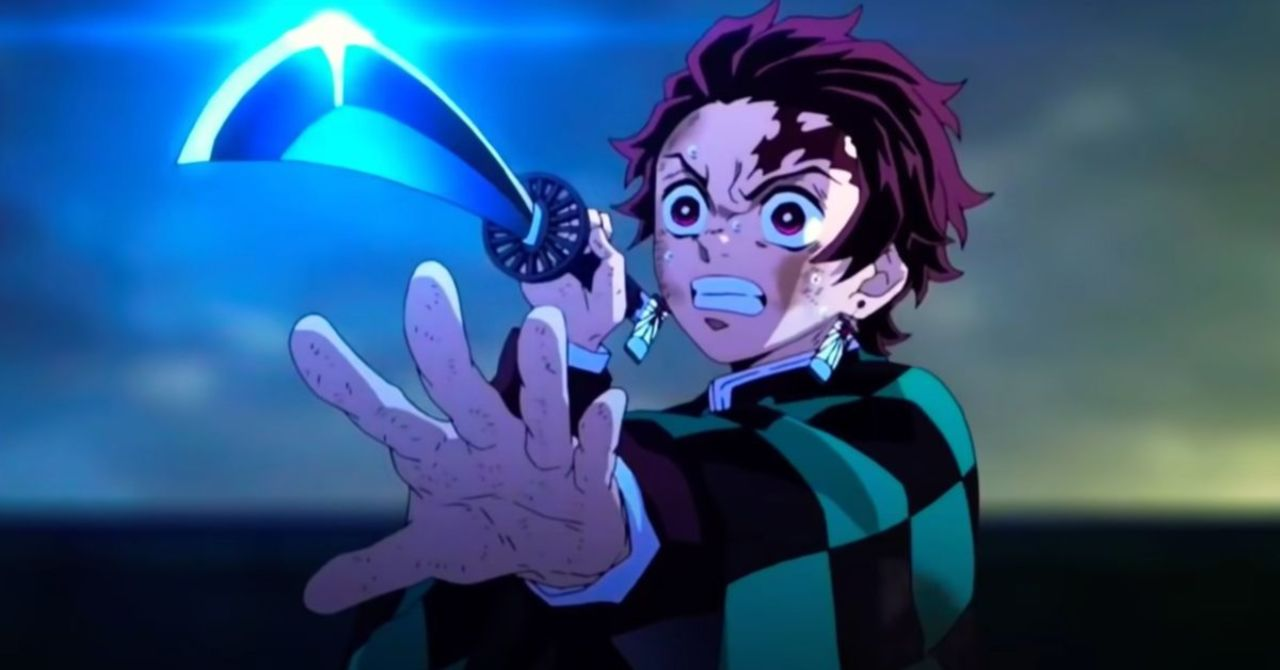

In [66]:
im = Image.open(image_paths[0])
im

In [67]:
w = 512

orig_size = im.size
aspect_ratio = orig_size[1] / orig_size[0]
new_size = int(w), int(w*aspect_ratio)

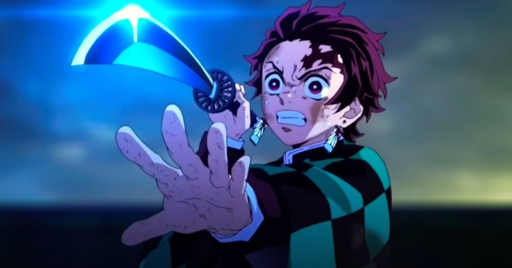

In [68]:
r_im = im.resize(new_size)
r_im

In [69]:
r_im.size

(512, 268)

Center Crop (square)

In [70]:
anchor = w//2 - new_size[1]//2
center_crop = (anchor, 0,  anchor+new_size[1], new_size[1])
center_crop

(122, 0, 390, 268)

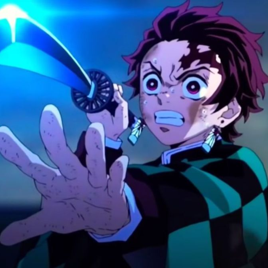

In [71]:
r_im.crop(center_crop)

In [72]:
@weave.op()
def resize(im: Image.Image, w: int=512) -> Image.Image:
    orig_size = im.size
    aspect_ratio = orig_size[1] / orig_size[0]
    new_size = int(w), int(w*aspect_ratio)
    return im.resize(new_size)

In [73]:
@weave.op()
def center_crop(im: Image.Image) -> Image.Image:
    new_size = im.size
    anchor = new_size[0]//2 - new_size[1]//2
    center_crop = (anchor, 0,  anchor+new_size[1], new_size[1])
    return im.crop(center_crop)

In [74]:
ims_table

In [ ]:
@weave.op()
def flip_lr(im: Image.Image) -> Image.Image:
    return im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)